# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [2]:
# loading our csv file as variable data, with pd.read_csv
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking the shape of the data with f-string followed by "". Values in {}
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(
    n=10, random_state=2
)  ## setting the random_state will ensure we get the same results every time

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1207,HTC,Android,12.70,no,no,8.0,5.0,32.0,4.0,2100.0,160.00,2014,1044,4.258446,5.247287
143,Samsung,Android,20.32,yes,no,5.0,2.0,16.0,1.5,4200.0,313.00,2015,909,4.326117,5.348202
3202,Huawei,Android,16.69,yes,yes,10.5,16.0,128.0,8.0,4000.0,178.00,2020,221,4.856474,6.152456
1127,Honor,Android,10.29,no,no,8.0,2.0,32.0,4.0,1730.0,159.00,2015,894,3.883006,4.248209
2926,Xiaomi,Android,14.83,yes,no,13.0,8.0,64.0,4.0,3000.0,150.00,2018,446,4.661551,5.131672
1726,LG,Android,7.67,no,no,2.0,1.3,16.0,4.0,1540.0,140.45,2014,952,3.384051,4.116595
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.00,2019,316,4.555244,4.602166
3273,Sony,Android,15.37,yes,yes,NaN,8.0,256.0,8.0,4000.0,181.40,2020,236,5.483427,6.839637
1411,Others,Others,19.94,no,no,5.0,2.0,32.0,4.0,4450.0,384.00,2014,767,4.368054,5.140552
551,Alcatel,Android,10.29,no,no,5.0,0.3,16.0,4.0,1800.0,157.00,2013,921,3.937496,4.603669


<IPython.core.display.Javascript object>

In [5]:
# We create a copy of the data to avoid any changes to the original data set
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# checking the column names, data-types and data-type numbers, non.null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [7]:
# find which object could be categoical values
df[df.select_dtypes(include=object).columns].nunique()

brand_name    34
os             4
4g             2
5g             2
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# as soon as those 3 object dtypes have less unique values we convert them to category
df["os"] = df["os"].astype("category")
df["4g"] = df["4g"].astype("category")
df["5g"] = df["5g"].astype("category")

<IPython.core.display.Javascript object>

In [9]:
# checking again the datatypes and checking the memory usage that obviously reduced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   object  
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3275 non-null   float64 
 6   selfie_camera_mp       3452 non-null   float64 
 7   int_memory             3450 non-null   float64 
 8   ram                    3450 non-null   float64 
 9   battery                3448 non-null   float64 
 10  weight                 3447 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

<IPython.core.display.Javascript object>

In [10]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [11]:
# checking the summary of missing values in the data per colummn
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# checking the percentage of missing values per column
df.isnull().sum() * 100 / df.shape[0]

brand_name               0.000000
os                       0.000000
screen_size              0.000000
4g                       0.000000
5g                       0.000000
main_camera_mp           5.182397
selfie_camera_mp         0.057904
int_memory               0.115808
ram                      0.115808
battery                  0.173712
weight                   0.202664
release_year             0.000000
days_used                0.000000
normalized_used_price    0.000000
normalized_new_price     0.000000
dtype: float64

<IPython.core.display.Javascript object>

* since there is not more than 50% of a column with missing values then i keep continue without delete or droping

In [13]:
# Let's check the statistical summary of the data for numeric columns.
df[df.select_dtypes(exclude=object).columns].describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## <a name='questions'>**Questions**:<a>

<a href = #link1>1. What does the distribution of normalized used device prices look like?</a>
 
<a href = #link2>2. What percentage of the used device market is dominated by Android devices?</a>

<a href = #link3>3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?</a>

<a href = #link4>4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?</a>

<a href = #link5>5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?</a>

<a href = #link6>6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?</a>

<a href = #link7>7. Which attributes are highly correlated with the normalized price of a used device?</a>

**Univariate Analysis**

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**************
<a name='link1'>**Question 1**</a>
**************

**What does the distribution of normalized used device prices look like?**

or return to <a href = #questions>Questions</a>


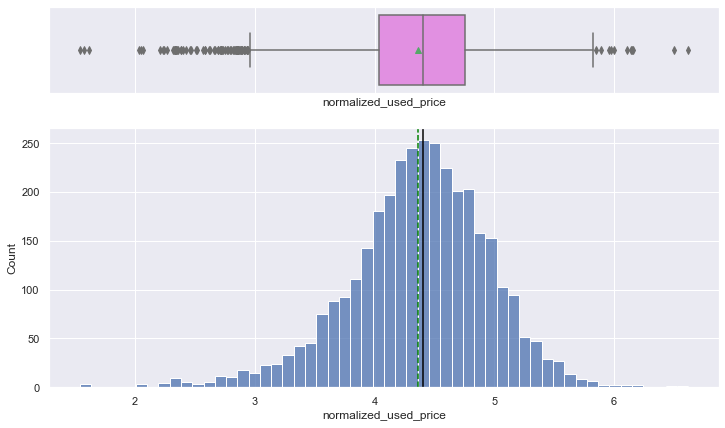

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(
    df, "normalized_used_price"
)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

In [17]:
print(
    f"The Mean is {round(df.normalized_used_price.mean(), 2)} and the Median is {round(df.normalized_used_price.median(), 2)}."
)

The Mean is 4.36 and the Median is 4.41.


<IPython.core.display.Javascript object>

**Observations**

* It's not skewed as the mean and median are close
* The data set has a symmetrical distribution
* Outliers on both sides

**`normalized_new_price`**

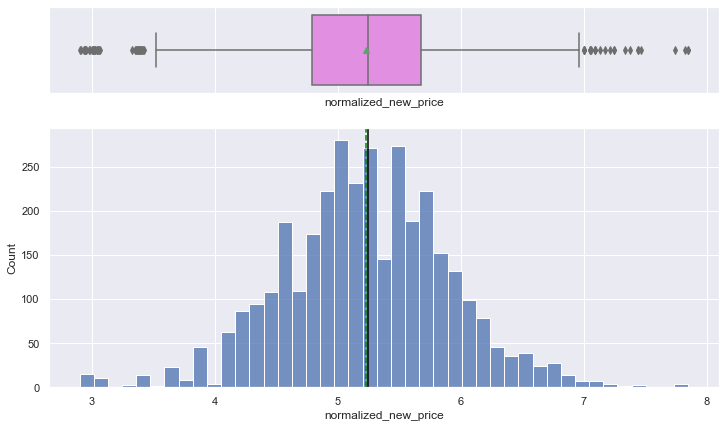

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(
    df, "normalized_new_price"
)  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

In [19]:
print(
    f"The Mean is {round(df.normalized_new_price.mean(), 2)} and the Median is {round(df.normalized_new_price.median(), 2)}."
)

The Mean is 5.23 and the Median is 5.25.


<IPython.core.display.Javascript object>

**Observations**

* The mean and median are close
* the data set has a symmetrical distribution

**`screen_size`**

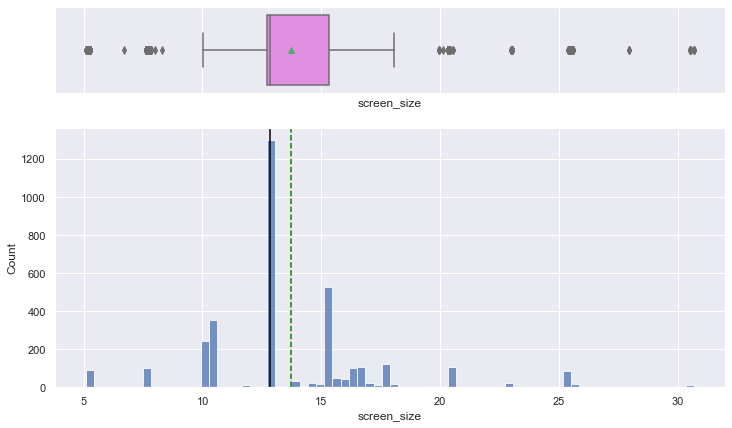

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(
    df, "screen_size"
)  ## Complete the code to create histogram_boxplot for 'screen_size'

In [21]:
print(
    f"The Mean is {round(df.screen_size.mean(), 2)} and the Median is {round(df.screen_size.median(), 2)}."
)

The Mean is 13.71 and the Median is 12.83.


<IPython.core.display.Javascript object>

**Observations**

* The median device Screen size  is 13.71 cm.
* As we can see on boxplot there are many outliers on both sides.


**`main_camera_mp`**

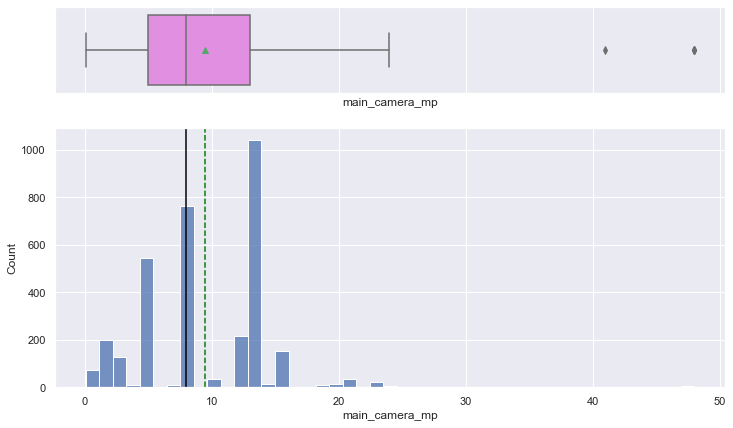

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(
    df, "main_camera_mp"
)  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**Observations**

* few outliers after Q3 value

**`selfie_camera_mp`**

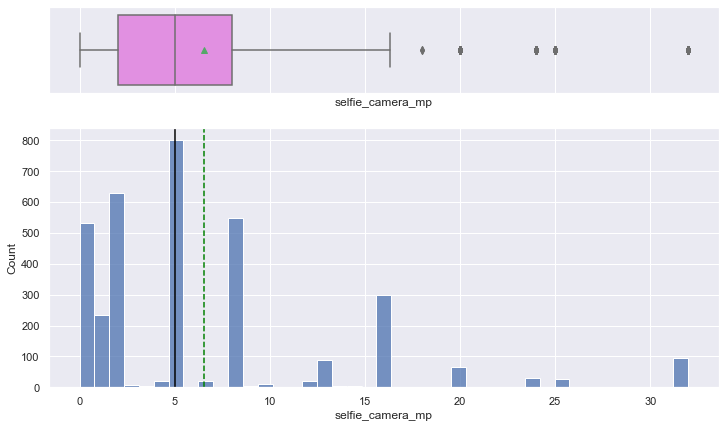

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(
    df, "selfie_camera_mp"
)  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**Observations**

* few outliers after Q3 value
* left skewed

**`int_memory`**

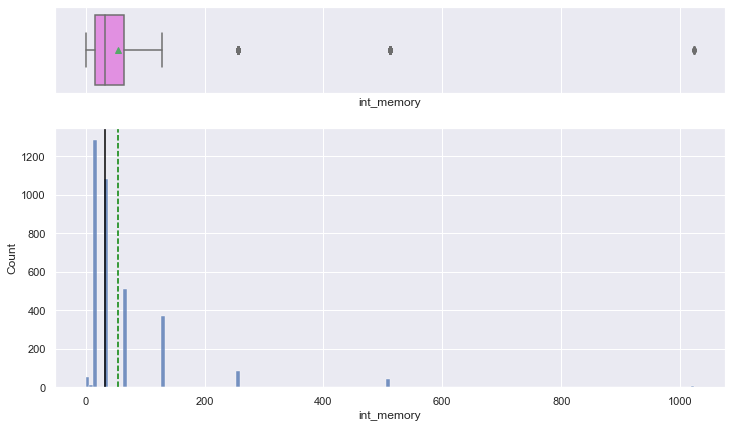

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(
    df, "int_memory"
)  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

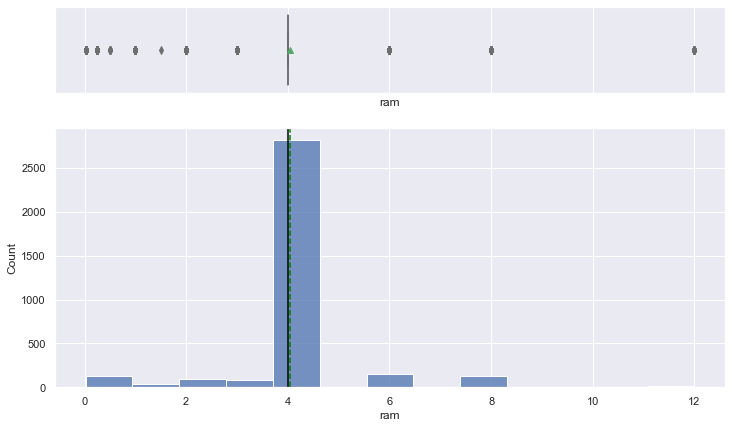

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "ram")  ## Complete the code to create histogram_boxplot for 'ram'

**Observations**

* Huge percentage of the devices use 4GB Ram. 
* Outliers on both sides

**`weight`**

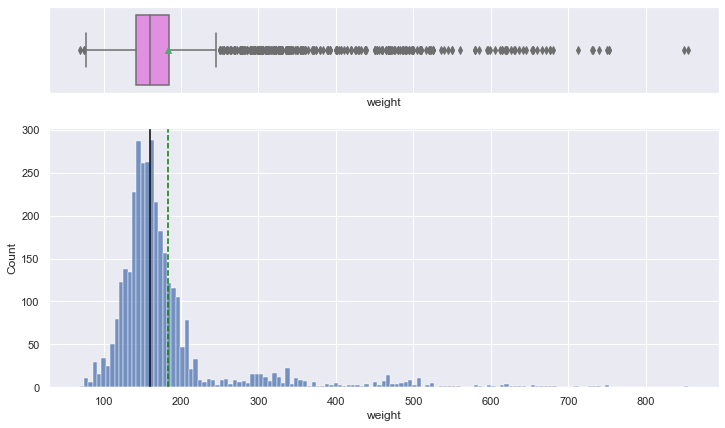

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(
    df, "weight"
)  ## Complete the code to create histogram_boxplot for 'weight'

In [27]:
print(
    f"The Mean is {round(df.weight.mean(), 2)} and the Median is {round(df.weight.median(), 2)}."
)

The Mean is 182.75 and the Median is 160.0.


<IPython.core.display.Javascript object>

**Observations**

* too many outliers after the average value.
* most devices are between 100 and 200 grrams.

**`battery`**

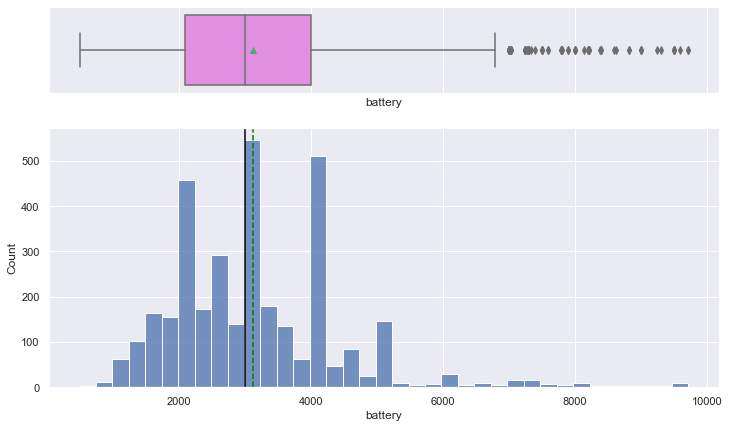

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(
    df, "battery"
)  ## Complete the code to create histogram_boxplot for 'battery'

In [29]:
print(
    f"The Mean is {round(df.battery.mean(), 2)} and the Median is {round(df.battery.median(), 2)}."
)

The Mean is 3133.4 and the Median is 3000.0.


<IPython.core.display.Javascript object>

**Observations**

* too many outliers only after the average value.
* most battery capacity are between 2000 and 5000 mAh.

**`days_used`**

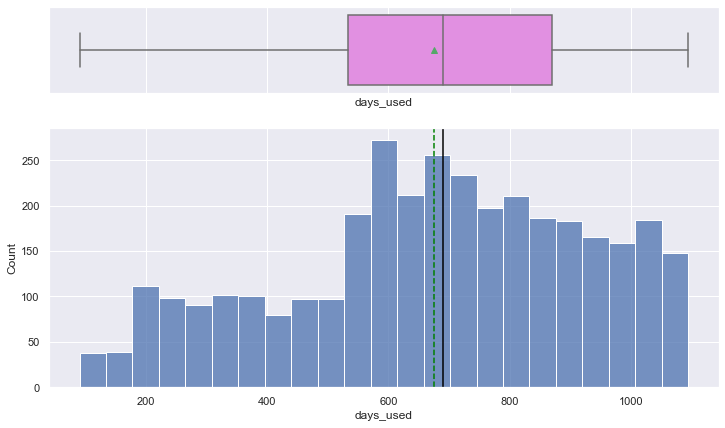

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(
    df, "days_used"
)  ## Complete the code to create histogram_boxplot for 'days_used'

In [31]:
print(
    f"The Mean is {round(df.days_used.mean(), 2)} and the Median is {round(df.days_used.median(), 2)}."
)

The Mean is 674.87 and the Median is 690.5.


<IPython.core.display.Javascript object>

**Observations**

* no outliers at this column.
* Median time of used device is approximately the 690 days.

**`brand_name`**

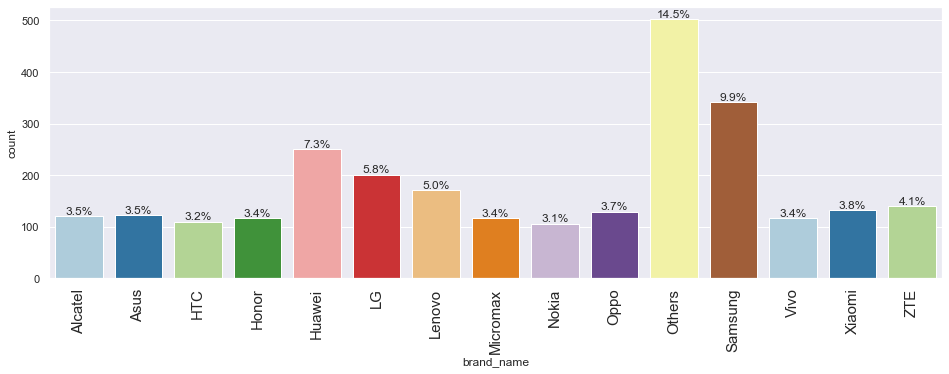

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "brand_name", perc=True, n=15)

**Observations**

* Percentage of some used Devices sorting with Brand name.
* We can see how popular is in this market Samsung.

****************
<a name='link2'>**Question 2**</a>
****************

**What percentage of the used device market is dominated by Android devices?**

or return to <a href = #questions>Questions</a>

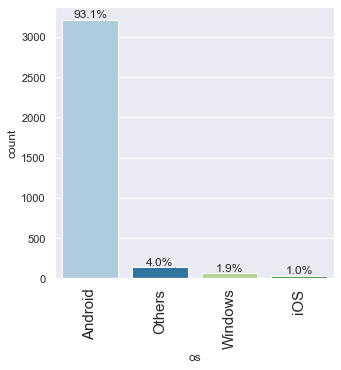

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(
    df, "os", perc=True
)  ## Complete the code to create labeled_barplot for 'os'

**Observations**

* Percentage of used Devices with Android OS is 93%.
* iOs only 1.0% .... quite dissapointing !

**`4g`**

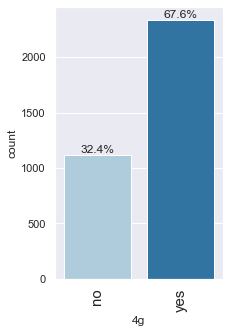

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(
    df, "4g", perc=True
)  ## Complete the code to create labeled_barplot for '4g'

**`5g`**

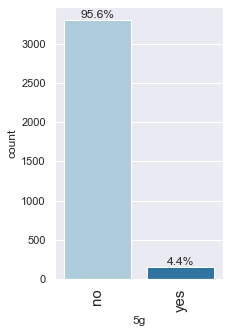

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(
    df, "5g", perc=True
)  ## Complete the code to create labeled_barplot for '5g'

**Observations**

* Percentage on the dataset of Devices that supporting '4G' is 67.6%.
* Percentage on the dataset of Devices that supporting '5G' is 4.4%.
    - surely the 5G devices supports 4G too
    - not big percentage because the last years 5G is widly used and not so many used devices.

**`release_year`**

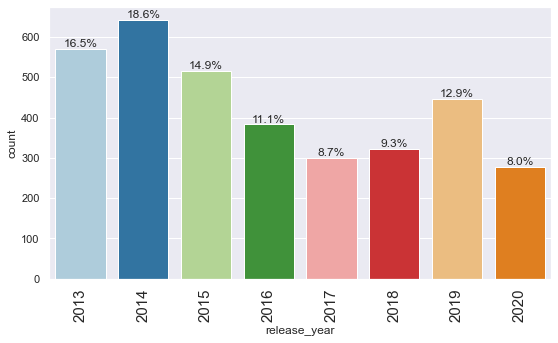

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(
    df, "release_year", perc=True
)  ## Complete the code to create labeled_barplot for 'release_year'

**Observations**

* Percentages with the release year of every used device.
* now we can understand better why 5G are not so many.
* most devices generally are quite old (more than 5 years)

### Bivariate Analysis

****************
<a name='link3'>**Question 3**</a>
****************


**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

or return to <a href = #questions>Questions</a>

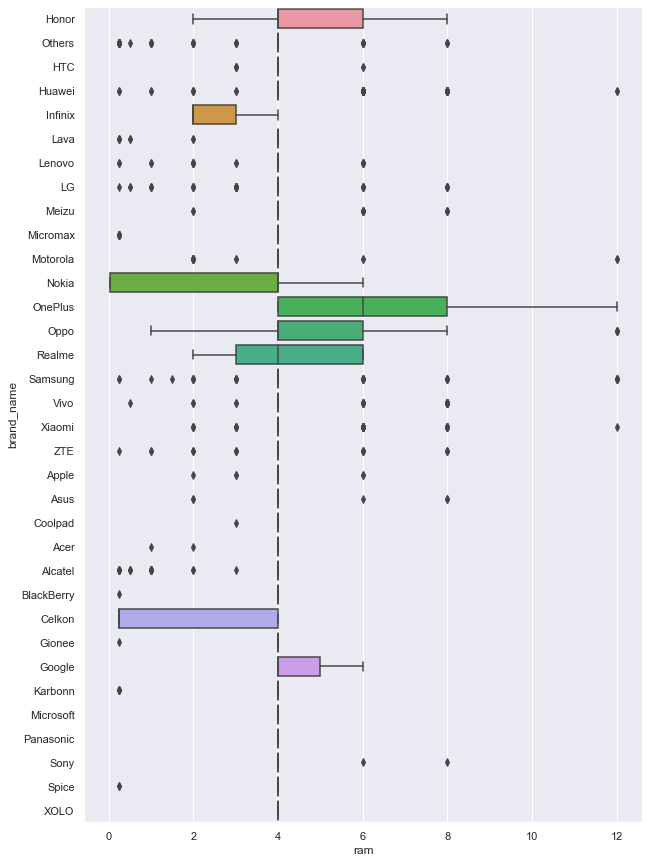

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(10, 15))
sns.boxplot(data=df, y="brand_name", x="ram")

plt.show()

**Observation**

* RAM varies for the most of the brands.
* Less known compnanies use mostly less RAM at their devices.
* Well known Tech companies use from 2GB to 12 GB as expected for their big range of models.
* Apple and Google seems with more standarized devices on RAM perspective.

********************
<a name='link4'>**Quesion 4**</a>
********************

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

or return to <a href = #questions>Questions</a>

In [38]:
# we create a new dataframe of only those devices which offer battery more than 4500mAh
df_large_battery = df[df.battery > 4500]
print(f"{df_large_battery.shape[0]} devices with more than 4500 mAh")

341 devices with more than 4500 mAh


<IPython.core.display.Javascript object>

In [39]:
df_large_battery.brand_name.value_counts()

Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
Gionee       10
ZTE          10
Acer          7
Infinix       6
Sony          6
Oppo          4
Alcatel       1
Google        1
HTC           1
Micromax      1
Nokia         1
Panasonic     1
Spice         1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

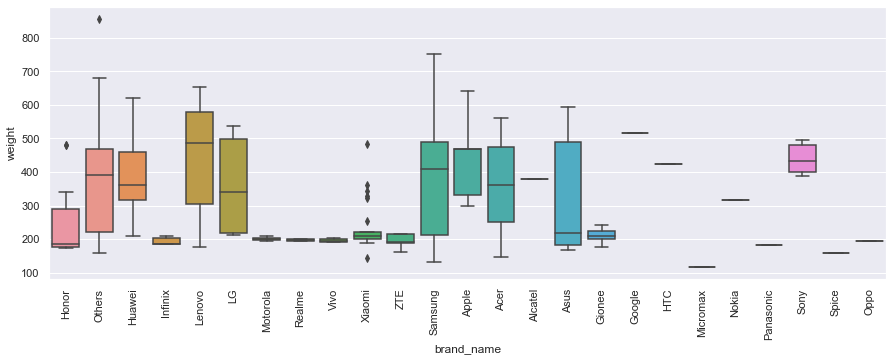

<IPython.core.display.Javascript object>

In [40]:
##  boxplot for 'brand_name' and 'weight'
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

**Observation**

* Samsung, Asus, Lenovo, Huaweii have a big variety of devices with big capacity and they can be light as well.
* There are too many devices from Other manufactures that they also offer such possibility.
* Xiami seems to have the best percentage of light devices with strong battery.

**************
<a name='link5'>**Question 5**</a>
**************

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

or return to <a href = #questions>Questions</a>

In [41]:
# create new dataframe with converting screen_size values from cm to inch. Then fullfil the case
df_large_screen = df[df.screen_size > 6 * 2.54]
print(f"{df_large_screen.shape[0]} devices with bigger than 6 inches mAh")

1099 devices with bigger than 6 inches mAh


<IPython.core.display.Javascript object>

In [42]:
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

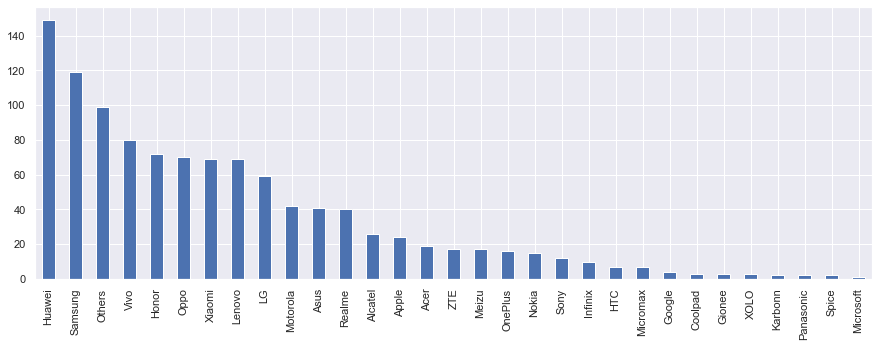

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 5))
df_large_screen.brand_name.value_counts().plot(kind="bar")

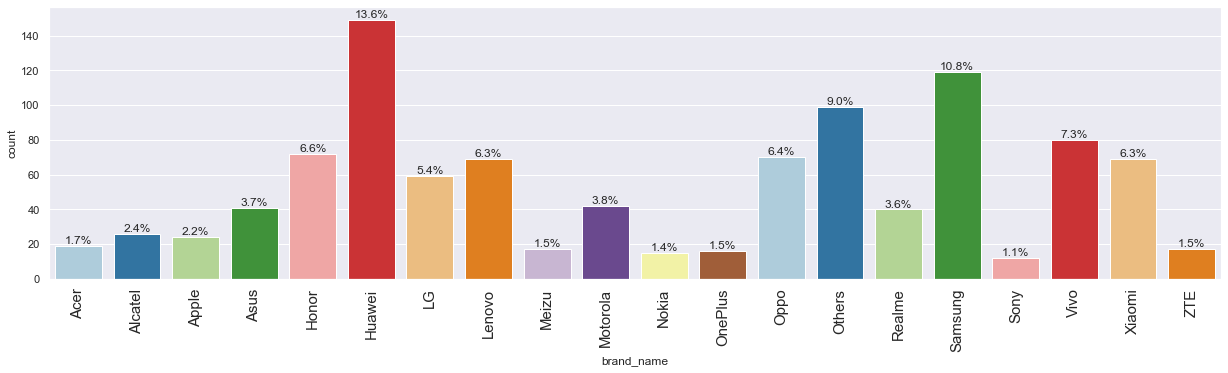

<IPython.core.display.Javascript object>

In [44]:
## Labeled_barplot for 'brand_name' in large screen dataframe to see the percentages also
labeled_barplot(
    df_large_screen, "brand_name", perc=True, n=20,
)

**Observations**

* Huawei and then follow Samsung and Other as the manufactures with the most devices with Screen bigger or equal 6 inches.
* Microsoft looks that didn't have such option as it has only 1.

**************
<a name='link6'>**Question 6**</a>
**************

**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

or return to <a href = #questions>Questions</a>

In [45]:
# Create dataframe for selfie cam with condition more than 8MP at the front camera
df_selfie_camera = df[df.selfie_camera_mp > 8]
print(f"{df_selfie_camera.shape[0]} devices with more than 8 MP or equal")

655 devices with more than 8 MP or equal


<IPython.core.display.Javascript object>

In [46]:
df_selfie_camera.brand_name.value_counts().sort_values(ascending=False)

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
OnePlus       18
Realme        18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

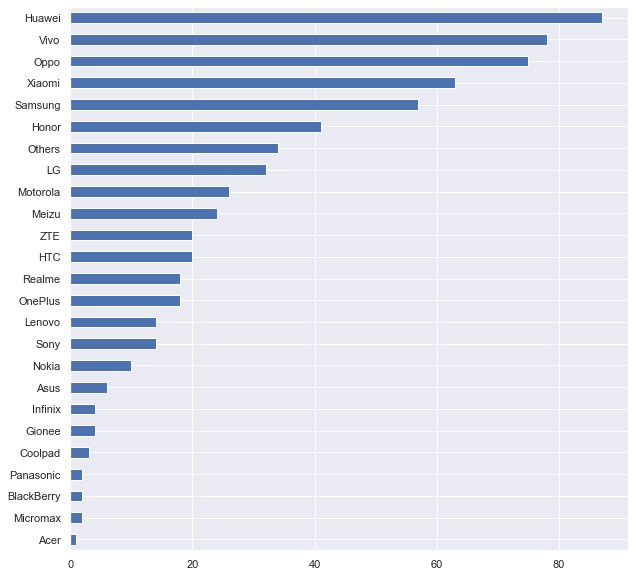

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(10, 10))
df_selfie_camera.brand_name.value_counts().sort_values().plot(kind="barh")

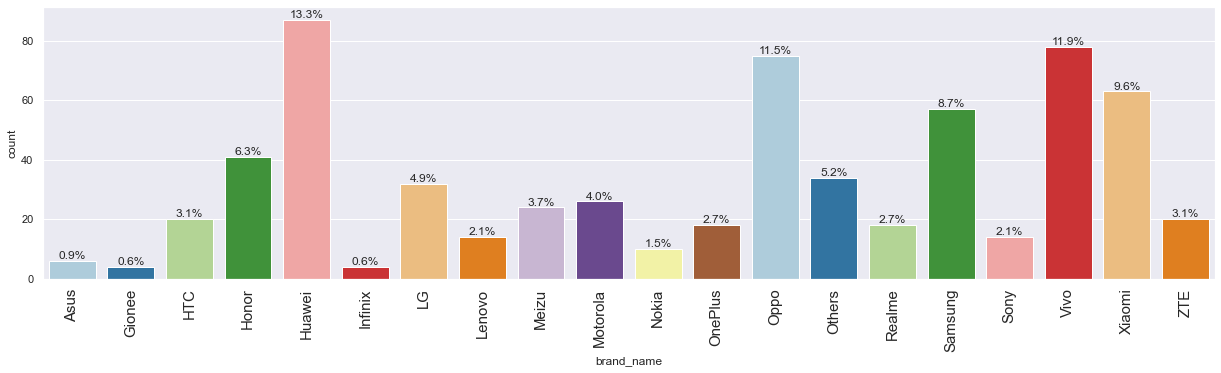

<IPython.core.display.Javascript object>

In [48]:
## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=20)

**Observations**

* Here Huawei has  the lion share. Follow the Vivo Oppo, Xiamo and then Sansung.
* Apple, Google and Microsoft have no entries at this table.

**************
<a name='link7'>**Question 7**</a>
**************

**Which attributes are highly correlated with the normalized price of a used device?**

or return to <a href = #questions>Questions</a>

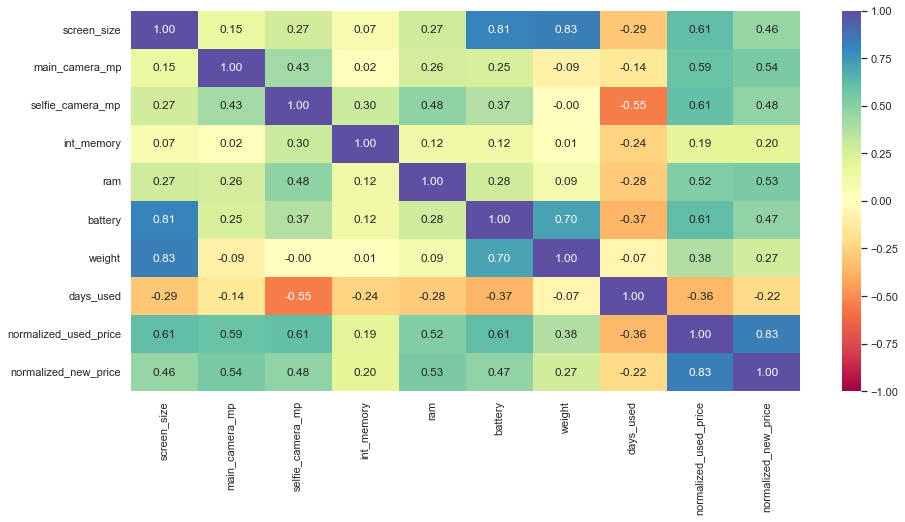

<IPython.core.display.Javascript object>

In [49]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

* as exected the normalized_ new_price is high correlated
* we can hardly say that somehow the normalized_used_price is also with the following attributes
    - battery
    - screen_size
    - selfie_camera_mp

# <a name='datpro'>Data Preprocessing<a>

1. <a href = #link8> Missing value Imputation</a>
2. <a href = #link9> Feature engineering (if needed)</a>
3. <a href = #link10> Outlier detection and treatment (if needed)</a>
4. <a href = #link11> Preparing data for modeling</a>
5. <a href = #link12> Any other preprocessing steps (if needed)</a>

### <a name='link8'>Missing Value Imputation</a>


- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

or return to <a href = #datpro>Data Preprocessing</a>

In [50]:
df1 = df.copy()

<IPython.core.display.Javascript object>

In [51]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [52]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
# Impute missing values in cols_impute with median by grouping the data on release year and brand name
for col in cols_impute:
    df1[col] = df1.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

<IPython.core.display.Javascript object>

In [53]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [54]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
# Impute the missing values in cols_impute with median by grouping the data on brand name
for col in cols_impute:
    df1[col] = df1.groupby("brand_name")[col].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [55]:
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

In [56]:
# we filling the rest values with the columns median
df1["main_camera_mp"].fillna(df1.main_camera_mp.median(), inplace=True)
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

+  Let us check the numeric columns for skewness.

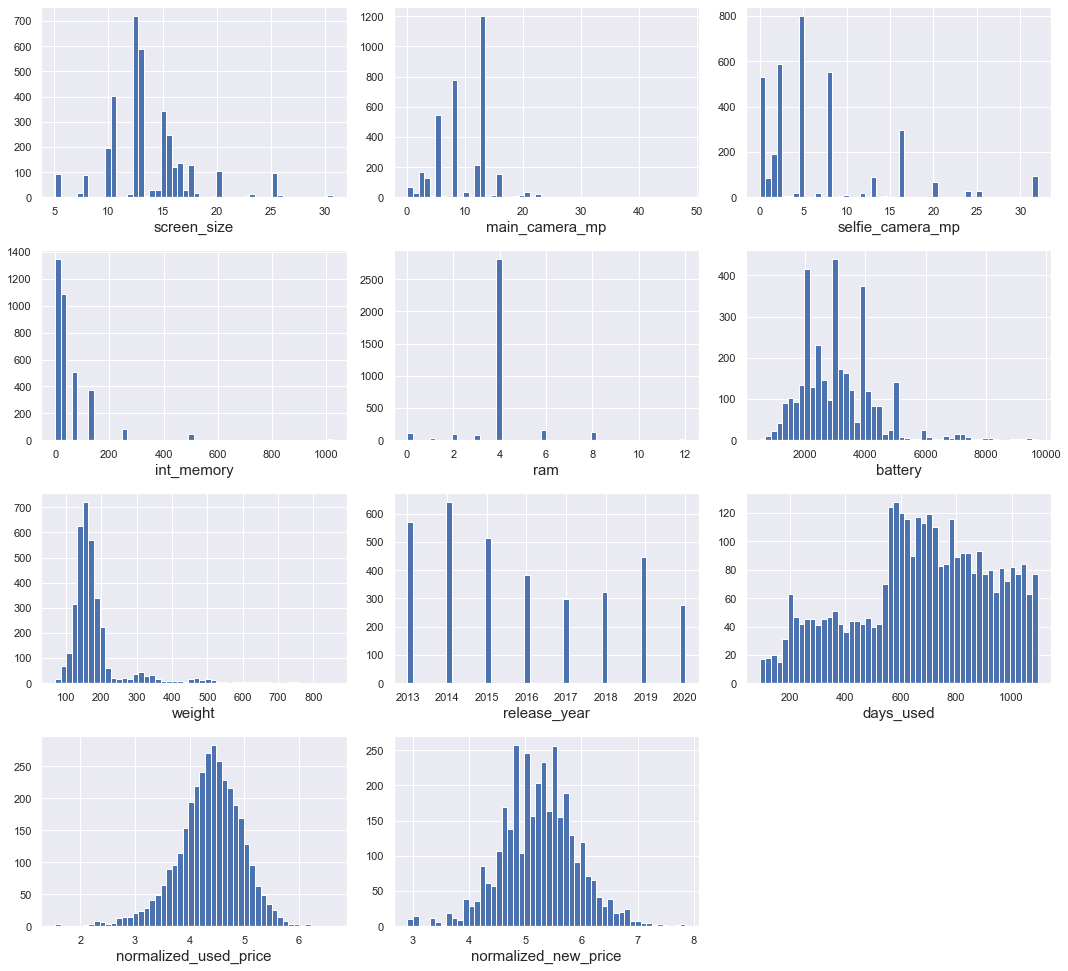

<IPython.core.display.Javascript object>

In [57]:
dist_cols = [item for item in df1.select_dtypes(include=np.number).columns]

plt.figure(figsize=(15, 30))
for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

* We see that most of the columns have a very skewed distribution.
* **We will apply the log transformation to all but the `normalized_used_price` column to deal with skewness in the data.**

In [58]:
# creating a copy of the dataframe
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [59]:
# dropping the rating column as it is almost normally distributed
dist_cols.remove("normalized_used_price")

# applying log transform
for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols, axis=1, inplace=True)
df2.head()

,brand_name,os,4g,5g,normalized_used_price,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,ram_log,battery_log,weight_log,release_year_log,days_used_log,normalized_new_price_log
0,Honor,Android,yes,no,4.307572,2.740840,2.639057,1.791759,4.174387,1.386294,8.013343,4.990433,7.611348,4.852030,1.743112
1,Honor,Android,yes,yes,5.162097,2.906901,2.639057,2.833213,4.859812,2.197225,8.366603,5.365976,7.611348,5.786897,1.874724
2,Honor,Android,yes,yes,5.111084,2.873000,2.639057,2.197225,4.859812,2.197225,8.343078,5.365976,7.611348,5.093750,1.929291
3,Honor,Android,yes,yes,5.135387,3.277145,2.639057,2.197225,4.174387,1.945910,8.888895,6.175867,7.611348,5.846439,1.891750
4,Honor,Android,yes,no,4.389995,2.792391,2.639057,2.197225,4.174387,1.386294,8.517393,5.225747,7.611348,5.683580,1.783028


<IPython.core.display.Javascript object>

**Let's check for skewness after applying the log transformation.**

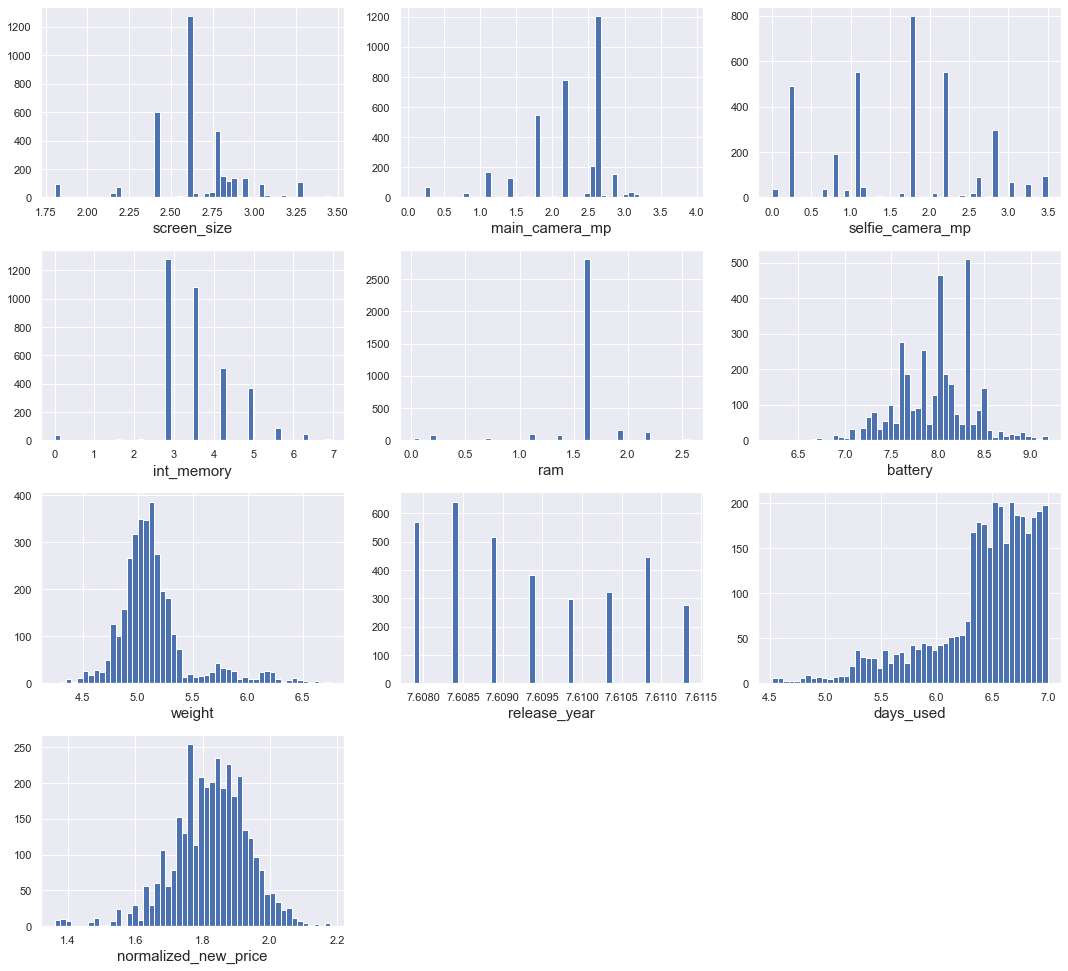

<IPython.core.display.Javascript object>

In [60]:
new_dist_cols = [item + "_log" for item in dist_cols]

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df2[new_dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

* The columns are still skewed, but not as heavily as before.

**Let's check for correlations between the columns**

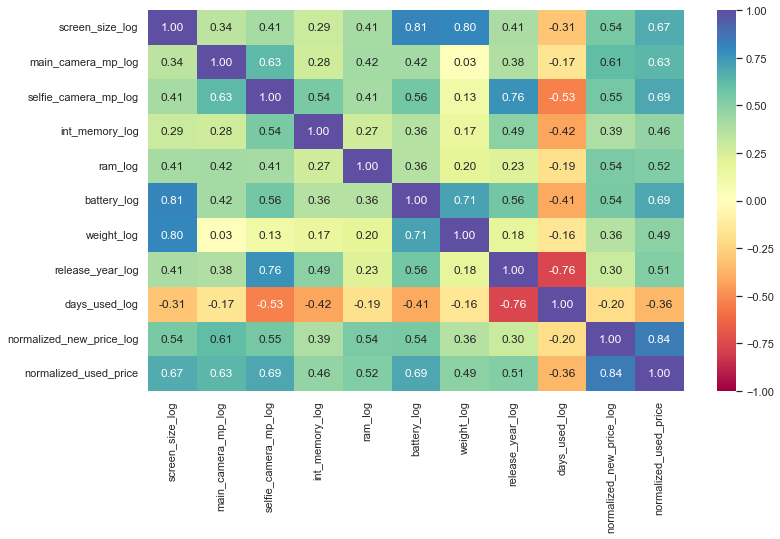

<IPython.core.display.Javascript object>

In [61]:
# adding rating for checking correlation
new_dist_cols.append("normalized_used_price")

plt.figure(figsize=(12, 7))
sns.heatmap(
    df2[new_dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are few highly correlated columns.

### <a name='link9'>Feature Engineering</a>
or return to <a href = #datpro>Data Preprocessing</a>


- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [62]:
df2["years_since_release"] = 2021 - df1["release_year"]
df2.drop("release_year_log", axis=1, inplace=True)
df2["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

In [63]:
df2.sample(10, random_state=2)

,brand_name,os,4g,5g,normalized_used_price,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,ram_log,battery_log,weight_log,days_used_log,normalized_new_price_log,years_since_release
1207,HTC,Android,no,no,4.258446,2.617396,2.197225,1.791759,3.496508,1.609438,7.650169,5.081404,6.951772,1.832147,7
143,Samsung,Android,yes,no,4.326117,3.059646,1.791759,1.098612,2.833213,0.916291,8.343078,5.749393,6.813445,1.848172,6
3202,Huawei,Android,yes,yes,4.856474,2.873000,2.442347,2.833213,4.859812,2.197225,8.294300,5.187386,5.402677,1.967456,1
1127,Honor,Android,no,no,3.883006,2.423917,2.197225,1.098612,3.496508,1.609438,7.456455,5.075174,6.796824,1.657887,6
2926,Xiaomi,Android,yes,no,4.661551,2.761907,2.639057,2.197225,4.174387,1.609438,8.006701,5.017280,6.102559,1.813468,3
1726,LG,Android,no,no,3.384051,2.159869,1.098612,0.832909,2.833213,1.609438,7.340187,4.951946,6.859615,1.632489,7
62,Infinix,Android,yes,no,4.555244,2.796671,2.197225,2.833213,3.496508,1.386294,8.294300,5.187386,5.758902,1.723153,2
3273,Sony,Android,yes,yes,5.483427,2.795450,2.639057,2.197225,5.549076,2.197225,8.294300,5.206202,5.468060,2.059193,1
1411,Others,Others,no,no,4.368054,3.041661,1.791759,1.098612,3.496508,1.609438,8.400884,5.953243,6.643790,1.814915,7
551,Alcatel,Android,no,no,3.937496,2.423917,1.791759,0.262364,2.833213,1.609438,7.496097,5.062595,6.826545,1.723422,8


<IPython.core.display.Javascript object>

### <a name='link10'>Outlier Detection<a>
or return to <a href = #datpro>Data Preprocessing</a>

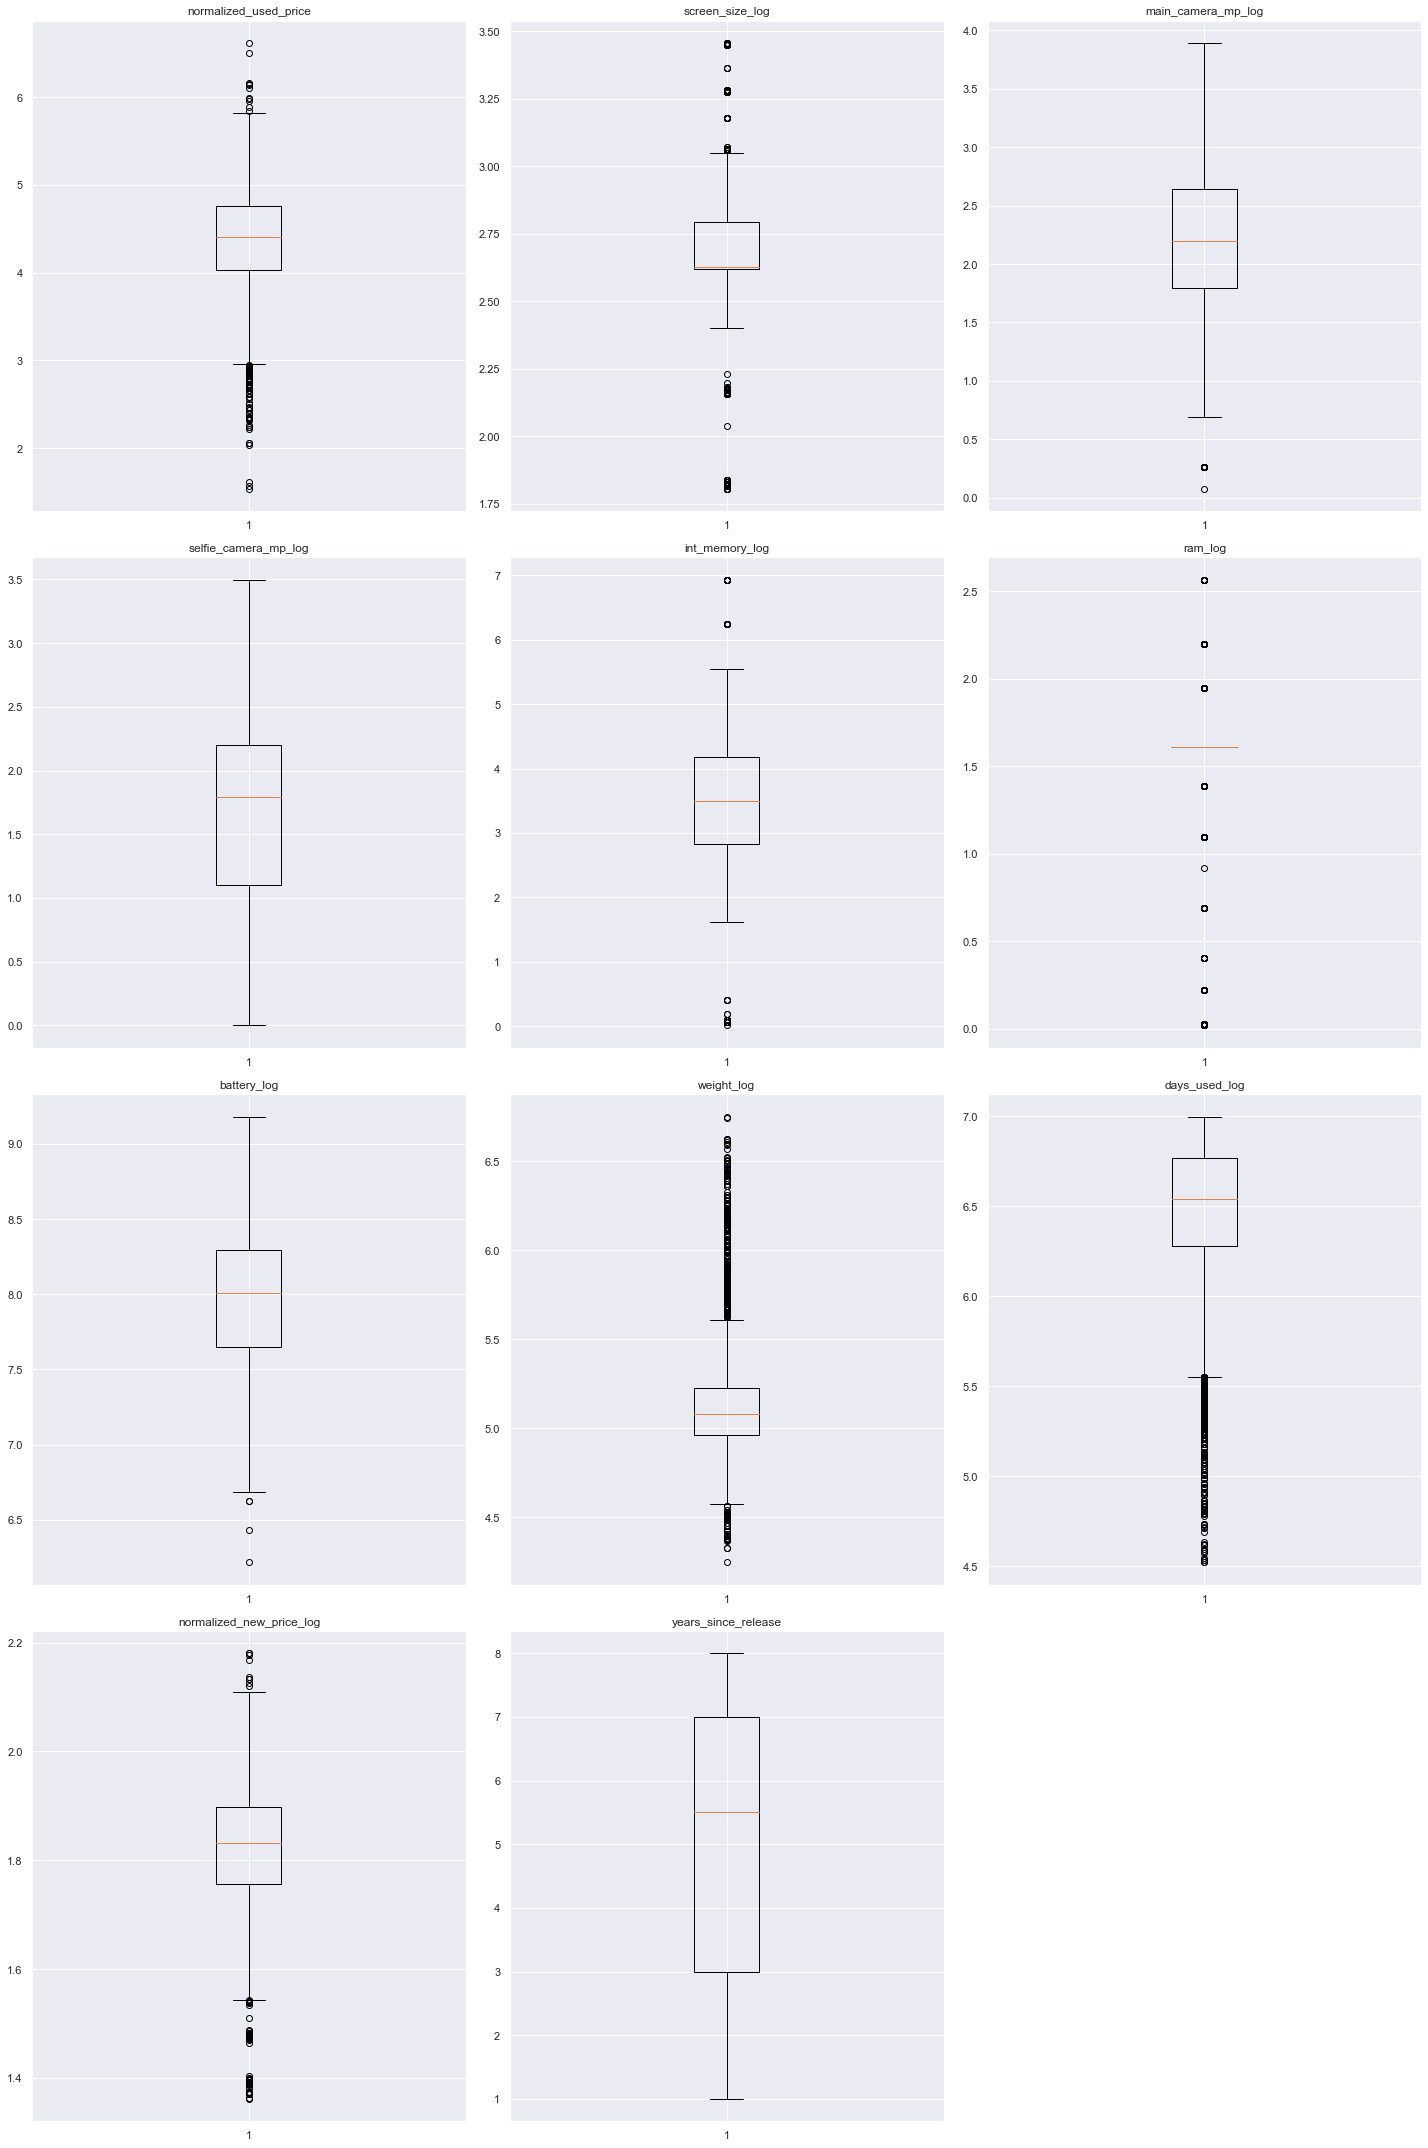

<IPython.core.display.Javascript object>

In [64]:
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Some of the columns do have outliers in them.
- We will treat these outliers by flooring and capping, i.e., we will replace the
    - lower outliers by Q1 - 1.5IQR.
    - upper outliers by Q3 + 1.5IQR.

**Note**: We will not treat outliers in the "ram_log" column as doing so will remove the variation in the column and most likely make it a constant, which is not desirable.

### Outlier Treatment (if needed)

In [65]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [66]:
treat_out_cols = [
    "screen_size_log",
    "main_camera_mp_log",
    "int_memory_log",
    "days_used_log",
    "battery_log",
    "weight_log",
    "normalized_new_price_log",
]  ## Complete the code to specify the columns for which outliers have to be treated



<IPython.core.display.Javascript object>

In [67]:
# outlier detection using boxplot as df3
df3 = treat_outliers_all(df2, treat_out_cols)

<IPython.core.display.Javascript object>

* Let's recheck the boxplots to see if outliers were treated.

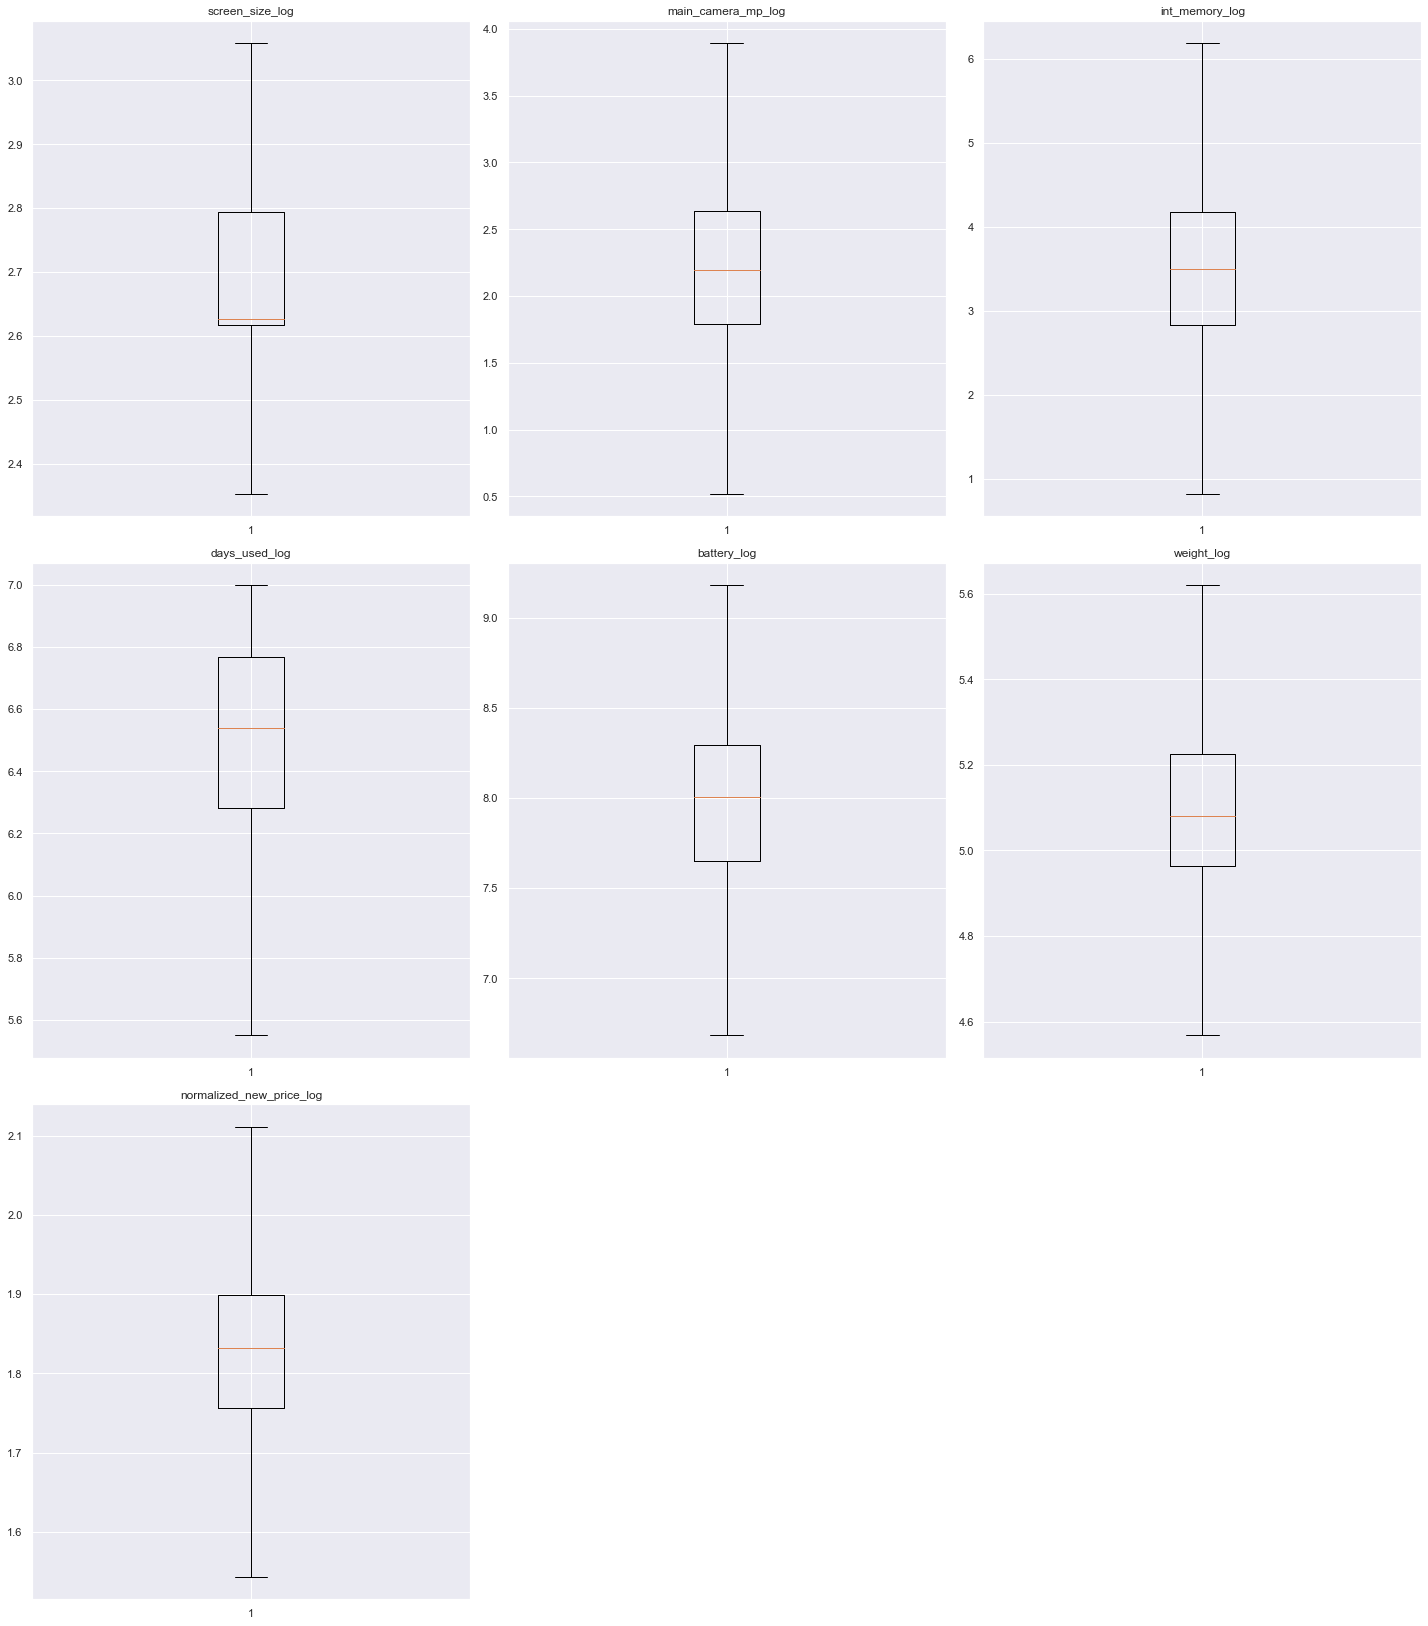

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(treat_out_cols):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df3[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers were treated.

In [69]:
# let's check the statistical summary of the data once
df3.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalized_used_price,3454.0,NaN,NaN,NaN,4.364712,0.588914,1.536867,4.033931,4.405133,4.7557,6.619433
screen_size_log,3454.0,NaN,NaN,NaN,2.666904,0.19226,2.353065,2.617396,2.62684,2.793616,3.057946
main_camera_mp_log,3454.0,NaN,NaN,NaN,2.238334,0.54835,0.520813,1.791759,2.197225,2.639057,3.89182
selfie_camera_mp_log,3454.0,NaN,NaN,NaN,1.640601,0.892082,0.0,1.098612,1.791759,2.197225,3.496508
int_memory_log,3454.0,NaN,NaN,NaN,3.544314,0.866263,0.821452,2.833213,3.496508,4.174387,6.186148
ram_log,3454.0,NaN,NaN,NaN,1.570055,0.338644,0.019803,1.609438,1.609438,1.609438,2.564949


<IPython.core.display.Javascript object>

## <a name='link11'>Data Preparation for modeling</a>
or return to <a href = #datpro>Data Preprocessing</a>


## Linear Model Building

1. We want to predict he normalized price of used devices.

2. We exclude Brand name for statistical purpose

3. Before we proceed to build a model, we'll have to encode categorical features.

4. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

5. We will build a Linear Regression model using the train data and then check it's performance

In [70]:
# assigh the categorical columns 4g and 5g as binary with no=0 and yes=1 with the function np.where from numpy
df3["4g"] = np.where(df3["4g"] == "no", 0, 1)
df3["5g"] = np.where(df3["5g"] == "no", 0, 1)

<IPython.core.display.Javascript object>

In [71]:
## Complete the code to define the dependent and independent variables
X = df3.drop(["normalized_used_price", "brand_name"], axis=1)
y = df3["normalized_used_price"]


display(X.head())
display()
display(y.head())


,os,4g,5g,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,ram_log,battery_log,weight_log,days_used_log,normalized_new_price_log,years_since_release
0,Android,1,0,2.740840,2.639057,1.791759,4.174387,1.386294,8.013343,4.990433,5.551018,1.743112,1
1,Android,1,1,2.906901,2.639057,2.833213,4.859812,2.197225,8.366603,5.365976,5.786897,1.874724,1
2,Android,1,1,2.873000,2.639057,2.197225,4.859812,2.197225,8.343078,5.365976,5.551018,1.929291,1
3,Android,1,1,3.057946,2.639057,2.197225,4.174387,1.945910,8.888895,5.620100,5.846439,1.891750,1
4,Android,1,0,2.792391,2.639057,2.197225,4.174387,1.386294,8.517393,5.225747,5.683580,1.783028,1


0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

<IPython.core.display.Javascript object>

In [72]:
# creating dummy variables
X = pd.get_dummies(
    X, columns=X.select_dtypes(include=["category"]).columns.tolist(), drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,4g,5g,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,ram_log,battery_log,weight_log,days_used_log,normalized_new_price_log,years_since_release,os_Others,os_Windows,os_iOS
0,1,0,2.740840,2.639057,1.791759,4.174387,1.386294,8.013343,4.990433,5.551018,1.743112,1,0,0,0
1,1,1,2.906901,2.639057,2.833213,4.859812,2.197225,8.366603,5.365976,5.786897,1.874724,1,0,0,0
2,1,1,2.873000,2.639057,2.197225,4.859812,2.197225,8.343078,5.365976,5.551018,1.929291,1,0,0,0
3,1,1,3.057946,2.639057,2.197225,4.174387,1.945910,8.888895,5.620100,5.846439,1.891750,1,0,0,0
4,1,0,2.792391,2.639057,2.197225,4.174387,1.386294,8.517393,5.225747,5.683580,1.783028,1,0,0,0


<IPython.core.display.Javascript object>

**as we can see the 4 values from "os" column now are the dummies. os_Others, os_Windows, os_iOs. Hidden is the os_Android** 

In [73]:
# the column names of the set
X.columns

Index(['4g', '5g', 'screen_size_log', 'main_camera_mp_log',
       'selfie_camera_mp_log', 'int_memory_log', 'ram_log', 'battery_log',
       'weight_log', 'days_used_log', 'normalized_new_price_log',
       'years_since_release', 'os_Others', 'os_Windows', 'os_iOS'],
      dtype='object')

<IPython.core.display.Javascript object>

In [74]:
# some statistic for our X dataset
X = X.astype(float)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
4g,3454.0,0.676028,0.468057,0.000000,0.000000,1.000000,1.000000,1.000000
5g,3454.0,0.044007,0.205140,0.000000,0.000000,0.000000,0.000000,1.000000
screen_size_log,3454.0,2.666904,0.192260,2.353065,2.617396,2.626840,2.793616,3.057946
main_camera_mp_log,3454.0,2.238334,0.548350,0.520813,1.791759,2.197225,2.639057,3.891820
selfie_camera_mp_log,3454.0,1.640601,0.892082,0.000000,1.098612,1.791759,2.197225,3.496508
int_memory_log,3454.0,3.544314,0.866263,0.821452,2.833213,3.496508,4.174387,6.186148
ram_log,3454.0,1.570055,0.338644,0.019803,1.609438,1.609438,1.609438,2.564949
battery_log,3454.0,7.969714,0.403379,6.683972,7.650169,8.006701,8.294300,9.182044
weight_log,3454.0,5.108166,0.243117,4.568492,4.962845,5.081404,5.225747,5.620100
days_used_log,3454.0,6.446713,0.416588,5.551018,6.281330,6.538863,6.768206,6.998510


<IPython.core.display.Javascript object>

In [75]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [76]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [77]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Let's check the coefficients and intercept of the model.**

In [78]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
4g,-0.001372
5g,0.014011
screen_size_log,0.619407
main_camera_mp_log,0.165299
selfie_camera_mp_log,0.093651
int_memory_log,0.013710
ram_log,0.085203
battery_log,-0.016318
weight_log,0.243286
days_used_log,0.024811


<IPython.core.display.Javascript object>

**<a name='link12'>Let's check the performance of the model using different metrics.**</a>

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [79]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [80]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, X_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238065,0.183318,0.837765,0.836752,4.42548


<IPython.core.display.Javascript object>

In [81]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237433,0.186215,0.834454,0.832022,4.444511


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 83.6%, indicating that the model explains 83.6% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict the price of a used device within a mean error of 0.18 on the test data.

- MAPE on the test set suggests we can predict within 4.44% of the life expectancy.

### Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [82]:
# let's add the intercept to data. SM library statsmodels.api as we define earlier at the top.
X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)

C:\Users\ckamp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

In [83]:
# Fitting a linear model
olsmodel1 = sm.OLS(y_train, X_train1).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     826.6
Date:                   Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                           19:17:45   Log-Likelihood:                 39.329
No. Observations:                   2417   AIC:                            -46.66
Df Residuals:                       2401   BIC:                             45.99
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *normalized_used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *normalized_used_price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

### Induction of OLS regression Results
-  Prob (F-statistic) of the model is 0.00. That is less than 0.05 and means that Linear Regression as the modeling technic is a good fit for this data.
- Adj.R-Squared are also more that 0.7 so we accept it


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [85]:
checking_vif(X_train1)

,feature,VIF
0,const,1540.021779
1,4g,2.383555
2,5g,1.461754
3,screen_size_log,5.155348
4,main_camera_mp_log,2.763041
5,selfie_camera_mp_log,4.509463
6,int_memory_log,1.670666
7,ram_log,1.820301
8,battery_log,4.604538
9,weight_log,4.458977


<IPython.core.display.Javascript object>

### Removing Multicollinearity (if needed)

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [86]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [87]:
# Complete the code to specify the columns with high VIF
col_list = [
    "screen_size_log",
    "years_since_release",
]


# Complete the code to check the effect on model performance after dropping specified columns from train data

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.835881,0.239493
1,screen_size_log,0.828999,0.244463


<IPython.core.display.Javascript object>

***we have to columns with more than 5. We select to drop firstly the value that affect less at our data. Bigger RMSE less Adj R-squared***

In [88]:
# Complete the code to specify the column to drop
# Complete the code to specify the train data from which to drop the column specified

col_to_drop = "screen_size"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]

# Complete the code to specify the test data from which to drop the column specified
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,1478.632811
1,4g,2.365078
2,5g,1.460767
3,main_camera_mp_log,2.748011
4,selfie_camera_mp_log,4.468402
5,int_memory_log,1.661685
6,ram_log,1.818505
7,battery_log,4.097684
8,weight_log,2.914856
9,days_used_log,2.865560


<IPython.core.display.Javascript object>

***we still have one value with more than 5, so we try one more time***

In [89]:
# Complete the code to specify the columns with high VIF
col_list = ["years_since_release"]

# Complete the code to check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.827497,0.245534


<IPython.core.display.Javascript object>

In [90]:
# Complete the code to specify the column to drop
col_to_drop = "years_since_release"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,1383.860187
1,4g,2.117231
2,5g,1.440017
3,main_camera_mp_log,2.747870
4,selfie_camera_mp_log,3.574261
5,int_memory_log,1.651110
6,ram_log,1.804911
7,battery_log,3.999536
8,weight_log,2.909774
9,days_used_log,1.792873


<IPython.core.display.Javascript object>

**The above predictors have no multicollinearity and the assumption is satisfied.**



### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.


* Let's check the model performance.

In [91]:
# Fitting a linear model
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.828
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     892.5
Date:                   Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                           19:17:46   Log-Likelihood:                -28.315
No. Observations:                   2417   AIC:                             84.63
Df Residuals:                       2403   BIC:                             165.7
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

**Observations**

- We can see that adj. R-squared has dropped from 0.837 to 0.827, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.


- *4g*, *5g*, *int_memory_log*, *os_Others*, *os_Windows*, and *os_iOS* have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [92]:
# initial list of columns
cols = (
    X_train3.columns.tolist()
)  ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[
        cols
    ]  ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp_log', 'selfie_camera_mp_log', 'ram_log', 'battery_log', 'weight_log', 'days_used_log', 'normalized_new_price_log']


<IPython.core.display.Javascript object>

In [93]:
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

<IPython.core.display.Javascript object>

In [94]:
olsmodel3 = sm.OLS(
    y_train, X_train4
).fit()  ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.828
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     1656.
Date:                   Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                           19:17:46   Log-Likelihood:                -31.888
No. Observations:                   2417   AIC:                             79.78
Df Residuals:                       2409   BIC:                             126.1
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train4* as the final ones and *olsmod2* as final model.**

**Observations**

* Now adjusted R-squared is 0.827, i.e., our model is able to explain ~82% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmodel2* (where we considered all the variables) was 0.827. This shows that the variables we dropped were not affecting the model at all.

**Now we'll check the rest of the assumptions on *olsmodel3*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [95]:
# We create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.257342,0.004633
3141,4.175156,3.965728,0.209428
1233,4.117410,4.572795,-0.455385
3046,3.782597,3.910156,-0.127558
2649,3.981922,3.917037,0.064885


<IPython.core.display.Javascript object>

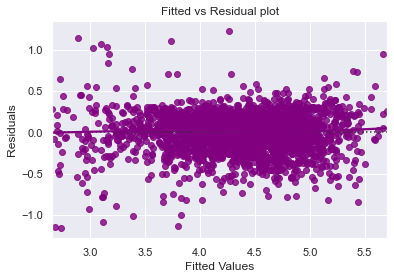

<IPython.core.display.Javascript object>

In [96]:
# We are plotting the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed
    * If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

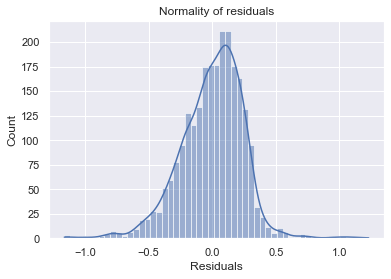

<IPython.core.display.Javascript object>

In [97]:
# Code to plot the distribution of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

In [98]:
print(
    "Average error:"
    + str(np.mean(df_pred.Residuals))
    + " Std dev:"
    + str(np.std(df_pred.Residuals))
)

Average error:-2.263623940981701e-15 Std dev:0.24518420149435335


<IPython.core.display.Javascript object>

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

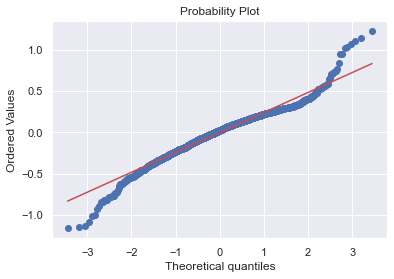

<IPython.core.display.Javascript object>

In [99]:
# Code check Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [100]:
# Code to apply the Shapiro-Wilks test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9684082269668579, pvalue=1.2264695648154812e-22)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.


****************
* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [101]:
# Code to apply the Goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 1.0099466030511781), ('p-value', 0.43194014794738766)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [102]:
# Predictions on the test set
pred = olsmodel3.predict(X_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=2)

,Actual,Predicted
2688,4.931159,4.902296
1740,4.322144,4.001489
3118,4.229604,4.275890
1539,4.463146,4.420139
990,4.349891,4.195096
2822,4.794467,4.710094
2785,4.146937,3.866738
2724,4.422208,4.386272
942,4.085640,3.964513
2752,4.213312,4.444812


<IPython.core.display.Javascript object>

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

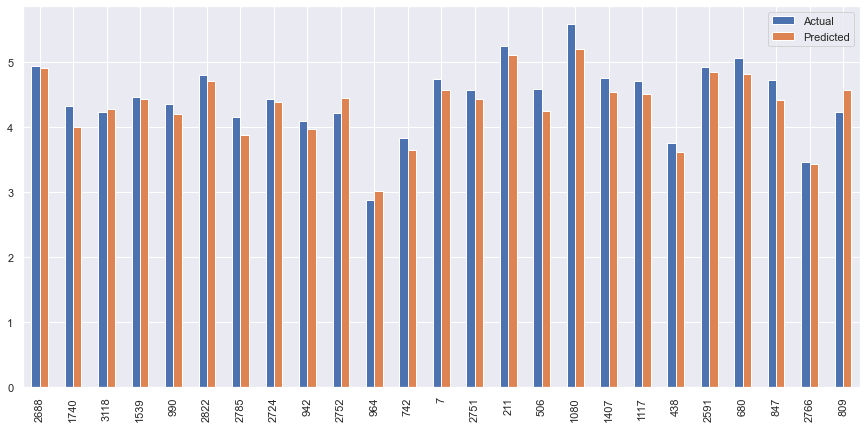

<IPython.core.display.Javascript object>

In [103]:
df4 = df_pred_test.sample(25, random_state=2)
df4.plot(kind="bar", figsize=(15, 7))
plt.show()

In [104]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel3, X_test4, y_test
)  ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238648,0.188219,0.832756,0.831455,4.4962


<IPython.core.display.Javascript object>

In [105]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel3, X_test4, y_test
)  ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238648,0.188219,0.832756,0.831455,4.4962


<IPython.core.display.Javascript object>

* The model is able to explain ~83% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 4.5% of the price of a used device. 

* Hence, we can conclude the model *olsmodel3* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

## Final Model Summary

In [106]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmodel_final_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.238065,0.238648
MAE,0.183318,0.188219
R-squared,0.837765,0.832756
Adj. R-squared,0.836752,0.831455
MAPE,4.425480,4.496200


<IPython.core.display.Javascript object>

In [107]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmodel_final_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.237433,0.238648
MAE,0.186215,0.188219
R-squared,0.834454,0.832756
Adj. R-squared,0.832022,0.831455
MAPE,4.444511,4.496200


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [108]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.828
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     1656.
Date:                   Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                           19:17:47   Log-Likelihood:                -31.888
No. Observations:                   2417   AIC:                             79.78
Df Residuals:                       2409   BIC:                             126.1
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

## Conclusion

    From our last model we can fianlly conclude that:
    - from negative coefficient in days_used_log we can expect that the age of the used device affects its price. 
    - from the other hand if the new price was high that increases the price of the used device too.
    - another part which could be issue for observation is the weight, because it appears to have an upward trend on its value. 